## COMP258 - NEURAL NETWORKS
### ASSIGNMENT 3
### NESTOR ROMERO - 301133331

In [20]:
# Basic imports
import numpy as np
import pandas as pd
import os, random

# TF imports
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

# Images imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image, display
import cv2 

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Set random seeds
np.random.seed(301133331)
tf.random.set_seed(301133331)

### Data loading and preprocessing

Total Mask: 5521 - Total No Mask: 5521
Sample image with mask


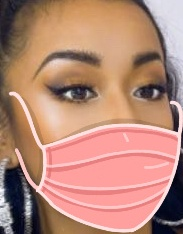

Sample image without mask


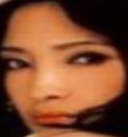

In [36]:
### LOADING DATA AND CREATING FILEPATH LISTS
###

mask_images = []
no_mask_images = []

dataset_base_path = os.path.join(os.getcwd(), 'Dataset')
# 
mask_images_paths = os.listdir(os.path.join(dataset_base_path, 'with_mask'))
mask_images_paths = [ os.path.join(dataset_base_path, 'with_mask', img) for img in mask_images_paths ]

# Take without_mask category as 0 label
no_mask_images_paths = os.listdir(os.path.join(dataset_base_path, 'without_mask'))
no_mask_images_paths = [ os.path.join(dataset_base_path, 'without_mask', img) for img in no_mask_images_paths ]

total_mask = len(mask_images_paths)
total_no_mask = len(no_mask_images_paths)
total_imgs = total_mask + total_no_mask

print(f'Total Mask: {total_mask} - Total No Mask: {total_no_mask}')

# Display samples for validation
idx = 3011
print('Sample image with mask')
display(Image(mask_images_paths[idx]))
print('Sample image without mask')
display(Image(no_mask_images_paths[idx]))  

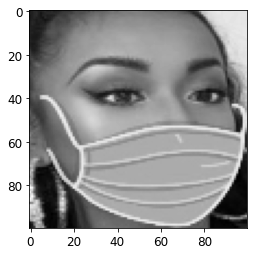

(0, 1)


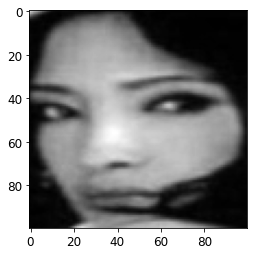

(1, 0)
Image preprocessing complete...


In [37]:
### CREATING DATASET STRUCTURES
###

X_path = []
y = []

# Create list of paths
# mask (0,1) no_mask (1,0)

index = 0
for m in range(total_mask):
    X_path.append(mask_images_paths[m])
    y.append((0,1))
    index += 1

for n in range(total_no_mask):
    X_path.append(no_mask_images_paths[n])
    y.append((1,0))
    index += 1

# print(index == total_imgs)

# Function to create image representation
# Transform to gray scale, resize to 100x100 and values in range [0,1]
def preprocess_image(path):
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    final_img = cv2.resize(gray_img, (100,100))
    return final_img/255


sample = X_path[idx]
result = preprocess_image(sample)
plt.imshow(result, cmap='gray')
plt.show()
print(y[idx])
sample2 = X_path[idx + 5521]
result2 = preprocess_image(sample2)
plt.imshow(result2, cmap='gray')
plt.show()
print(y[idx + 5521])

X_pre = np.array([preprocess_image(img) for img in X_path])
# Reshape image to CNN expected format 1 channel
X_pre = np.reshape(X_pre,(X_pre.shape[0],100,100,1))

y = np.array(y)

print('Image preprocessing complete...')

In [45]:
### CREATE TRAINING, TESTING AND VALIDATION SETS
###

## Train - Test (90-10)
## Train - Validation (80-20)

X_train, X_test, y_train, y_test = train_test_split(X_pre, y, train_size=0.9, random_state=301133331, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=301133331, shuffle=True)

print( f'X_train: {X_train.shape} Y_train: {y_train.shape}')
print( f'X_val: {X_val.shape} Y_val: {y_val.shape}')
print( f'X_test: {X_test.shape} Y_test: {y_test.shape}')


X_train: (7949, 100, 100, 1) Y_train: (7949, 2)
X_val: (1988, 100, 100, 1) Y_val: (1988, 2)
X_test: (1105, 100, 100, 1) Y_test: (1105, 2)


### Modeling

In [6]:
# CNN Image Model Definition
# Dataset shape = Num Imgs x 100 x 100 x 1 channel
model = keras.models.Sequential()
model.add(keras.layers.Input((100,100,1), name='Input'))
model.add(keras.layers.Conv2D(filters=200, kernel_size=3, padding='valid', activation='relu', name='Conv2D-200'))
model.add(keras.layers.MaxPool2D(pool_size=3))
model.add(keras.layers.Conv2D(filters=100, kernel_size=3, padding='valid', activation='relu', name='Conv2D-100'))
model.add(keras.layers.MaxPool2D(pool_size=3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units= 64, activation="relu", name='Dense64'))
model.add(keras.layers.Dense(units= 2, activation="softmax", name='Output'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-200 (Conv2D)          (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 200)       0         
_________________________________________________________________
Conv2D-100 (Conv2D)          (None, 30, 30, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
Dense64 (Dense)              (None, 64)                640064    
_________________________________________________________________
Output (Dense)               (None, 2)                 1

Epoch 1/5
249/249 [==============================] - 229s 921ms/step - loss: 0.3450 - accuracy: 0.8499 - val_loss: 0.1819 - val_accuracy: 0.9341
Epoch 2/5
249/249 [==============================] - 243s 976ms/step - loss: 0.1668 - accuracy: 0.9365 - val_loss: 0.1526 - val_accuracy: 0.9386
Epoch 3/5
249/249 [==============================] - 239s 959ms/step - loss: 0.1193 - accuracy: 0.9568 - val_loss: 0.1419 - val_accuracy: 0.9532
Epoch 4/5
249/249 [==============================] - 241s 968ms/step - loss: 0.0930 - accuracy: 0.9675 - val_loss: 0.1283 - val_accuracy: 0.9588
Epoch 5/5
35/35 [==============================] - 8s 225ms/step - loss: 0.0800 - accuracy: 0.9710


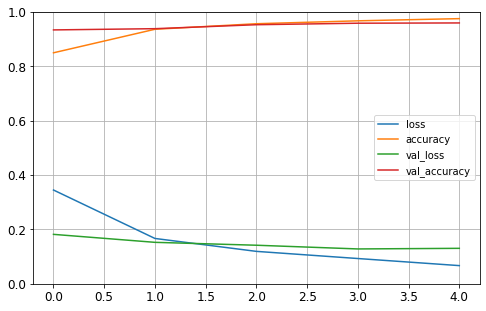

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./mask_detection_model\assets


In [7]:
### MODEL COMPILATION AND TRAINING
###

# Use model_checkpoint as recommended in the paper
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Monitor model training and save the best version
model_history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val),
                          callbacks=[checkpoint_callback])

model_score = model.evaluate(X_test, y_test)

# Plot Loss Score and Accuracy
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Save model
model.save('./mask_detection_model')



### Results Analysis
As it can be seen from the model training results, unlike the paper that indicated the use of 20 ephocs for training, in this case only 5 were required to achieve high levels of accuracy. It is noticeable how the larger dataset (5x size of the paper datasets) played a very important role in the model training. The paper stated that the model reached an accuracy of 94.58%, and in this case the model reached an accuracy of 97.10%

The curves from the loss and accuracy metrics show how the behavior of the model is stable for both testing and validation sets, and with validation showing very good results from the very beggining

Below, some tests are conducted by loading the model from disk and then predicting a few samples to verify the results

In [43]:
### TESTING AND DISPLAY RESULTS
###

# Loading model from savefile
mask_detection_model = keras.models.load_model('./mask_detection_model')

# Loading weights from checkpoint
# mask_detection_model.load_weights('./checkpoint')

This section calls the predict method and extracts the class label as '0' for no mask or '1' for mask using np.argmax(...)

Because of the data shape used for the output layer in the CNN Architecture described in the paper, the original labels use a different notation where [1,0] represents no mask (bit 0) and [0,1] represents mask (bit 1)

Sample Indx: [509, 1005, 116, 131, 884, 68, 558, 66, 7, 580, 806, 573, 1094, 1064, 1089]


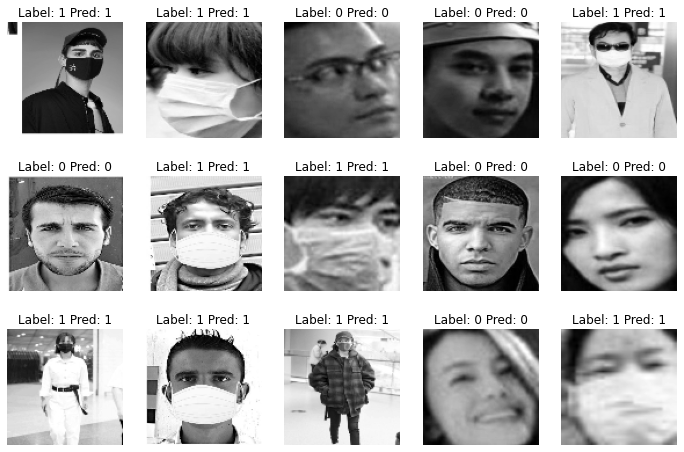

In [47]:
# Collect and display sample results

rows = 3
columns = 5

sample_indexes = [random.randrange(0, len(X_test)) for _ in range(rows*columns)]
print(f'Sample Indx: {sample_indexes}')

# extract a few samples from testing set
X_sample = X_test[sample_indexes] 
y_sample = y_test[sample_indexes]
y_pred = mask_detection_model.predict(X_sample)
y_pred = [np.argmax(p) for p in y_pred]

plt.figure(figsize=(12,8))
img_index = 0
for row in range(rows):
    for col in range(columns):
        plt.subplot(rows, columns, img_index+1)
        plt.imshow(X_sample[img_index], cmap='gray')
        plt.title(f'Label: {np.argmax(y_sample[img_index])} Pred: {y_pred[img_index]}')
        plt.axis("off")
        img_index += 1
plt.show()